In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv(r"C:\Users\LENOVO\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
df['TotalCharges'] = pd.to_numeric(df[ 'TotalCharges'], errors='coerce')

In [10]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [11]:
df.drop('customerID', axis=1, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [13]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

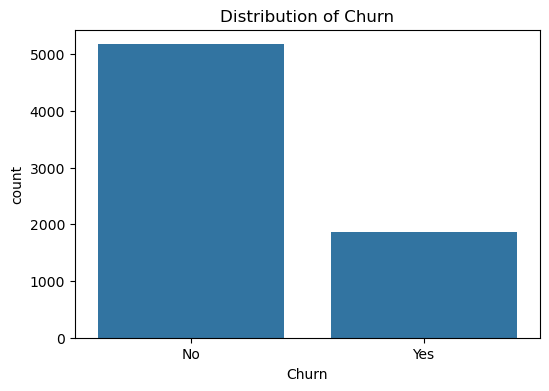

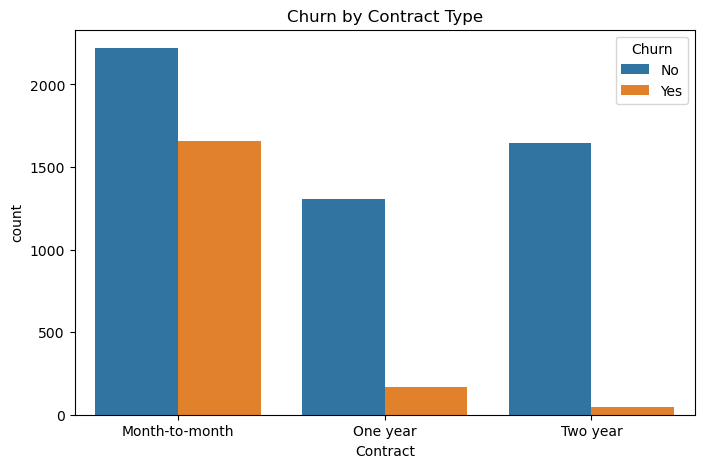

In [14]:
#churn honare lok kiti aahet te baghuya
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.show()
#contract type cha churn var kay parinam hoto
plt.figure(figsize=(8,5))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.show()



In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [16]:
one_hot1 = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
df = pd.get_dummies(data=df, columns=one_hot1)

In [17]:
print(df.columns)
df.head()

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMetho

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,True,False,False,True,False,False,False,False,True,False


In [18]:
from sklearn.model_selection import train_test_split
x = df.drop('Churn', axis=1)
y = df['Churn']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("Training set cha shape", x_train.shape)
print("Testing set cha shape", x_test.shape)

Training set cha shape (5634, 40)
Testing set cha shape (1409, 40)


In [19]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Model training complete")

Model training complete


In [20]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy Score:",accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.801277501774308
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.67      0.49      0.57       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



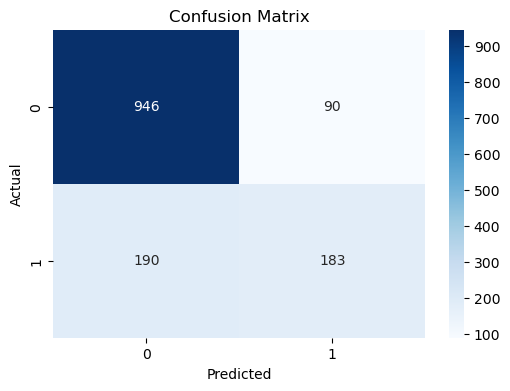

In [25]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [27]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)
model_new = RandomForestClassifier(n_estimators=100, random_state=42)
model_new.fit(x_train_res, y_train_res)
y_pred_new = model_new.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred_new))
print(classification_report(y_test, y_pred_new))      

Accuracy: 0.7856635911994322
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1036
           1       0.61      0.53      0.57       373

    accuracy                           0.79      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [29]:
import pickle
with open('churn_model.pkl', 'wb') as file:
          pickle.dump(model_new, file)

In [32]:
!pip install gradio

   ---------------------------------------- 0.0/24.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/24.2 MB ? eta -:--:--
    --------------------------------------- 0.5/24.2 MB 978.6 kB/s eta 0:00:25
   - -------------------------------------- 0.8/24.2 MB 1.2 MB/s eta 0:00:20
   - -------------------------------------- 1.0/24.2 MB 1.2 MB/s eta 0:00:19
   - -------------------------------------- 1.0/24.2 MB 1.2 MB/s eta 0:00:19
   - -------------------------------------- 1.0/24.2 MB 1.2 MB/s eta 0:00:19
   - -------------------------------------- 1.0/24.2 MB 1.2 MB/s eta 0:00:19
   -- ------------------------------------- 1.3/24.2 MB 673.3 kB/s eta 0:00:34
   -- ------------------------------------- 1.3/24.2 MB 673.3 kB/s eta 0:00:34
   -- ------------------------------------- 1.3/24.2 MB 673.3 kB/s eta 0:00:34
   -- -------------

In [35]:
import gradio as gr
import pickle
import pandas as pd
import numpy as np

# 1. Model load kara
with open('churn_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# 2. Training chya veliche sagle columns chi yadi (X_train.columns)
# Tumchya 40 columns chi sequence ithe asne garjeche aahe
model_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 
                 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
                 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes',
                 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No',
                 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
                 'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes',
                 'DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes',
                 'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
                 'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
                 'StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes',
                 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
                 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)',
                 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

def predict_churn(gender, tenure, monthly_charges, contract):
    # Rikaama dataframe banva jyat sagle 40 columns 0 astil
    input_df = pd.DataFrame(0, index=[0], columns=model_columns)
    
    # User ne dilelya values bhara
    input_df['gender'] = int(gender)
    input_df['tenure'] = int(tenure)
    input_df['MonthlyCharges'] = float(monthly_charges)
    input_df['TotalCharges'] = float(tenure * monthly_charges) # Ek andaaje total
    
    # Contract sathi One-Hot logic (Gradio madhla select kelala option 1 kara)
    contract_col = f"Contract_{contract}"
    if contract_col in model_columns:
        input_df[contract_col] = 1
        
    # Model kadhun prediction ghya
    prediction = loaded_model.predict(input_df)
    
    if prediction[0] == 1:
        return "⚠️ High Risk: Grahak sodun jaanyachi shakyata aahe!"
    else:
        return "✅ Low Risk: Grahak sobat rahil."

# 3. Interface launch kara
interface = gr.Interface(
    fn=predict_churn, 
    inputs=[
        gr.Dropdown(choices=[("Female", 0), ("Male", 1)], label="Gender"),
        gr.Slider(1, 72, step=1, label="Tenure (Months)"),
        gr.Number(label="Monthly Charges"),
        gr.Dropdown(choices=["Month-to-month", "One year", "Two year"], label="Contract Type")
    ],
    outputs="text",
    title="Telecom Customer Churn Predictor"
)

interface.launch(share=True)

* Running on local URL:  http://127.0.0.1:7861
* Running on public URL: https://91a14d94327c1d3936.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
